# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?APPID={weather_api_key}&units=metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data (take out 20 limit)
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&q={city}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | manatutu
City not found. Skipping...
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | deqen
Processing Record 7 of Set 1 | palmer
Processing Record 8 of Set 1 | aketi
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | saint-pierre
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | aripuana
Processing Record 15 of Set 1 | yamada
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | kingston
Processing Record 18 of Set 1 | praia da vitoria
Processing Record 19 of Set 1 | majene
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | taiohae
City not found. Skipping..

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,16.61,72,4,0.45,US,1725838404
1,edinburgh of the seven seas,-37.0676,-12.3116,12.65,75,100,7.83,SH,1725838405
2,georgetown,5.4112,100.3354,25.96,87,20,1.03,MY,1725838408
3,hermanus,-34.4187,19.2345,10.20,71,46,4.82,ZA,1725838306
4,deqen,29.9618,90.7188,7.42,86,79,1.68,CN,1725838308


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,16.61,72,4,0.45,US,1725838404
1,edinburgh of the seven seas,-37.0676,-12.3116,12.65,75,100,7.83,SH,1725838405
2,georgetown,5.4112,100.3354,25.96,87,20,1.03,MY,1725838408
3,hermanus,-34.4187,19.2345,10.20,71,46,4.82,ZA,1725838306
4,deqen,29.9618,90.7188,7.42,86,79,1.68,CN,1725838308


### Create the Scatter Plots Requested

In [29]:
# Create Date
date = time.strftime("%Y-%m-%d")

#### Latitude Vs. Temperature

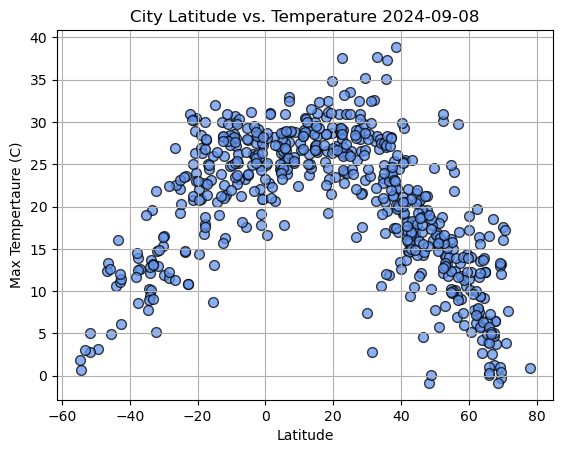

In [30]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

plt.scatter(x_values, y_values,
            marker="o",
            facecolors="cornflowerblue",
            edgecolors="black",
            s=50,
            alpha=0.75)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.xlabel("Latitude")
plt.ylabel("Max Tempertaure (C)")
plt.title(f"City Latitude vs. Temperature {date}")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

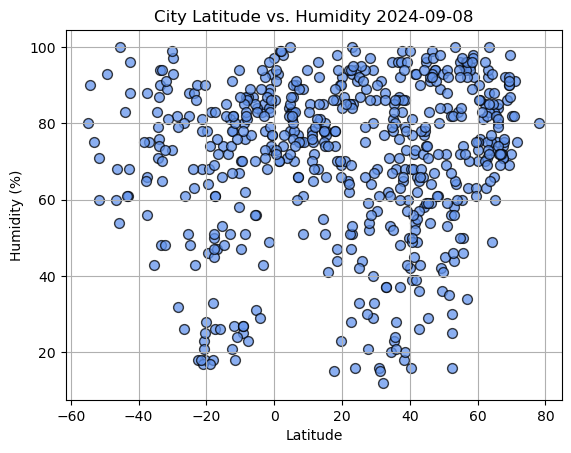

In [31]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

plt.scatter(x_values, y_values,
            marker="o",
            facecolors="cornflowerblue",
            edgecolors="black",
            s=50,
            alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity {date}")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

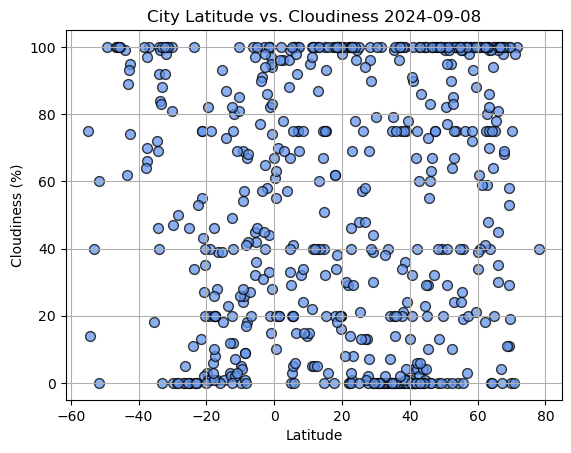

In [32]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

plt.scatter(x_values, y_values,
            marker="o",
            facecolors="cornflowerblue",
            edgecolors="black",
            s=50,
            alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

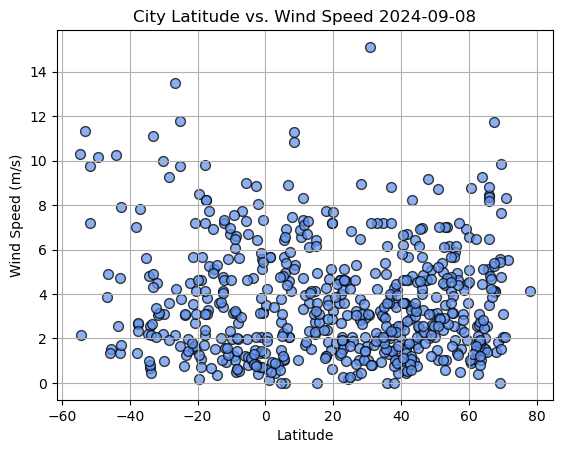

In [33]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

plt.scatter(x_values, y_values,
            marker="o",
            facecolors="cornflowerblue",
            edgecolors="black",
            s=50,
            alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def regressionplot (x_values, y_values): 

    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

    # Calculate the regression line values based on the slope and intercept
    regress_values = slope * x_values + intercept

    # Create a string for the regression line equation
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Plot Scatter Plot
    plt.scatter(x_values, y_values,
            marker="o",
            facecolors="cornflowerblue",
            edgecolors="black",
            s=50,
            alpha=0.75)
    
    # Plot the regression line on the scatter plot
    plt.plot(x_values, regress_values, "r-", label=f"Fit: {line_eq}")

    # Annotate the plot with the regression line equation
    plt.annotate(line_eq, 
             (x_values.min(), y_values.max() * 0.9),
             fontsize=15, 
             color="red")
    
    # Add text for the regression statistics
    stats_text = f"Slope: {slope:.2f}\nIntercept: {intercept:.2f}\nR-squared: {rvalue**2:.2f}"
    plt.text(0.05, 0.05, stats_text, fontsize=12, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

    #Show the plot
    plt.show()

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,16.61,72,4,0.45,US,1725838404
2,georgetown,5.4112,100.3354,25.96,87,20,1.03,MY,1725838408
4,deqen,29.9618,90.7188,7.42,86,79,1.68,CN,1725838308
5,palmer,42.1584,-72.3287,15.85,66,4,1.77,US,1725838411
6,aketi,2.7388,23.7833,20.69,98,78,0.43,CD,1725838412
...,...,...,...,...,...,...,...,...,...
582,bartonville,40.6503,-89.6520,20.54,50,32,1.11,US,1725839179
583,west bay,19.3667,-81.4167,31.04,70,20,5.14,KY,1725839182
586,jingdezhen,29.2947,117.2079,28.68,67,0,1.45,CN,1725839185


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,edinburgh of the seven seas,-37.0676,-12.3116,12.65,75,100,7.83,SH,1725838405
3,hermanus,-34.4187,19.2345,10.20,71,46,4.82,ZA,1725838306
7,hithadhoo,-0.6000,73.0833,27.97,73,74,3.18,MV,1725838414
8,waitangi,-43.9535,-176.5597,10.57,83,99,10.25,NZ,1725838312
9,port elizabeth,-33.9180,25.5701,12.16,76,40,2.57,ZA,1725838416
...,...,...,...,...,...,...,...,...,...
568,sorong,-0.8833,131.2500,26.29,86,95,5.12,ID,1725839162
575,bom jesus,-9.0744,-44.3586,27.67,27,28,3.25,BR,1725839171
579,vanimo,-2.6741,141.3028,28.86,71,94,0.74,PG,1725839176


###  Temperature vs. Latitude Linear Regression Plot

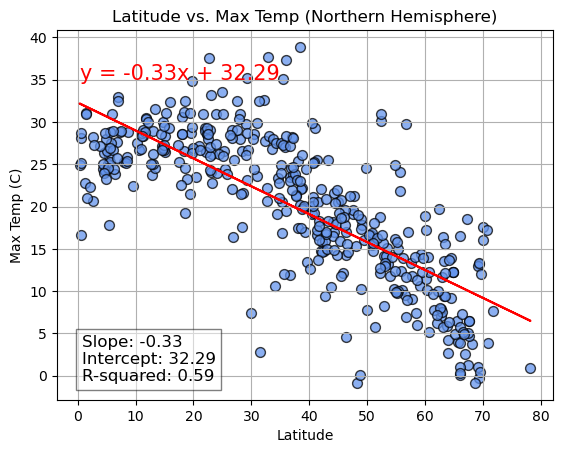

In [37]:
# Linear regression on Northern Hemisphere

# Extract x and y values from the DataFrame
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Label the x-axis and y-axis, set the title and add a grid
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Latitude vs. Max Temp (Northern Hemisphere)")
plt.grid(True)

regressionplot (x_values, y_values)

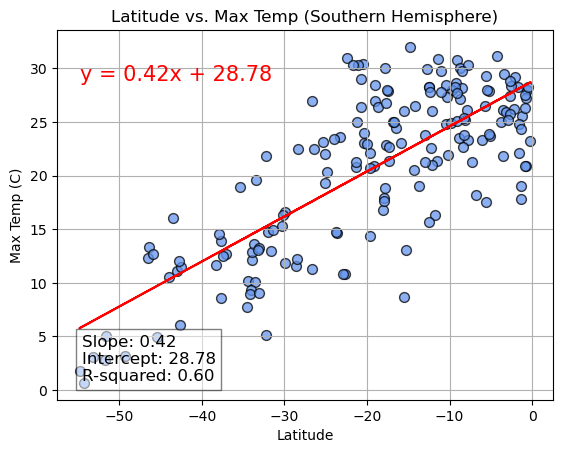

In [38]:
# Linear regression on Southern Hemisphere

# Extract x and y values from the DataFrame
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Label the x-axis and y-axis, set the title and add a grid
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Latitude vs. Max Temp (Southern Hemisphere)")
plt.grid(True)

regressionplot (x_values, y_values)

**Discussion about the linear relationship:** In both the northern and southern hemisphere we see a relationship between the max temp and latitude. In the northen hemisphere we see a negatively correlated relationship. Given the r squared value of 0.59, we can say latitude can be a moderately strong predictor of max temp values (59% of the variability in the dependent variables (temp) is explained by the independent variables (latitude). A negative correlation makes sense for the northern hemisphere because this relationship shows that as we approach the equator (latitude 0) the temperature generally increases, which we know to be true. In the southern hemisphere we see a postivce correlation. The r squared value of 0.60 indicates  latitude can be a moderately strong predictor of max temp values (60% of the variability in the dependent variables (temp) is explained by the independent variables (latitude). A positive correlation makes sense for the southern hemisphere because this relationship shows that as latitude increases to 0 (approaching the equator) temp increases which we know to be true.

### Humidity vs. Latitude Linear Regression Plot

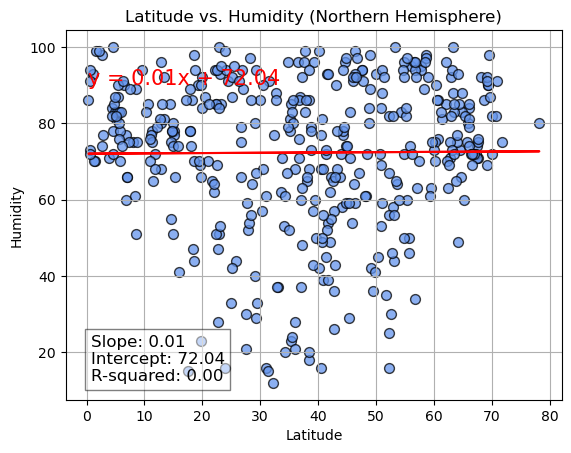

In [39]:
# Northern Hemisphere

# Extract x and y values from the DataFrame
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Label the x-axis and y-axis, set the title and add a grid
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity (Northern Hemisphere)")
plt.grid(True)

regressionplot (x_values, y_values)

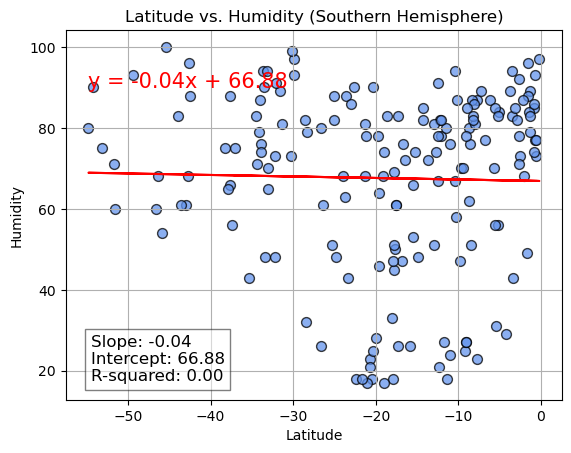

In [40]:
# Southern Hemisphere

# Extract x and y values from the DataFrame
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Label the x-axis and y-axis, set the title and add a grid
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity (Southern Hemisphere)")
plt.grid(True)

regressionplot (x_values, y_values)

**Discussion about the linear relationship:** In both the northern and southern hemisphere we do not see a relationship between the humidity and latitude. The regression lines in both hemispheres are flat with an r-squared of 0 indicating latitude is not an accurate predictor of humidity.

### Cloudiness vs. Latitude Linear Regression Plot

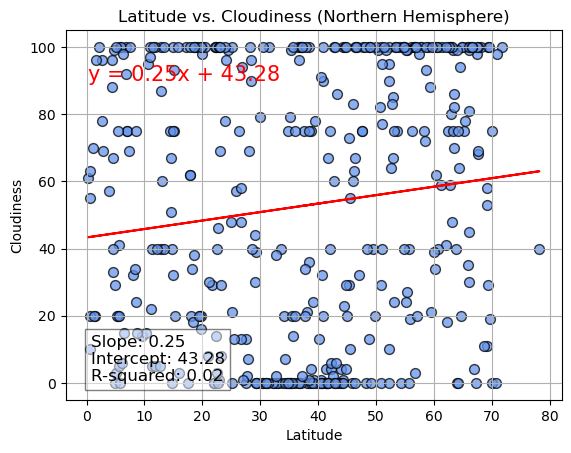

In [41]:
# Northern Hemisphere

# Extract x and y values from the DataFrame
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Label the x-axis and y-axis, set the title and add a grid
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness (Northern Hemisphere)")
plt.grid(True)

regressionplot (x_values, y_values)

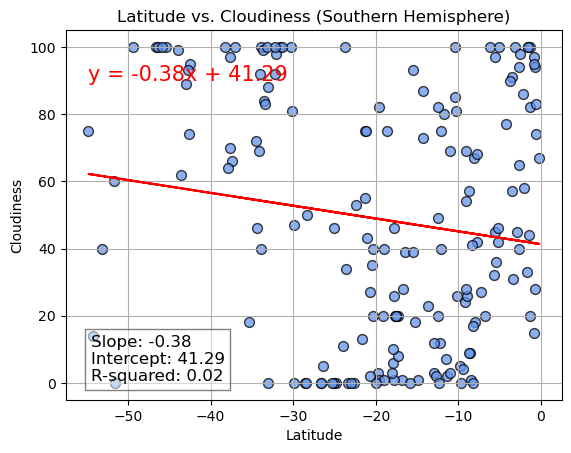

In [42]:
# Southern Hemisphere

# Extract x and y values from the DataFrame
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Label the x-axis and y-axis, set the title and add a grid
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness (Southern Hemisphere)")
plt.grid(True)

regressionplot (x_values, y_values)

**Discussion about the linear relationship:** In both the northern and southern hemisphere we do not see a strong relationship between cloudiness and latitude. The regression line in the north shows a weak negative correlation with and r-squared of 0.02 indicating latitude is not a strong predictor of cloudiness. The regression line in the south shows a weak positive correlation with and r-squared of 0.02 indicating latitude is not a strong predictor of cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

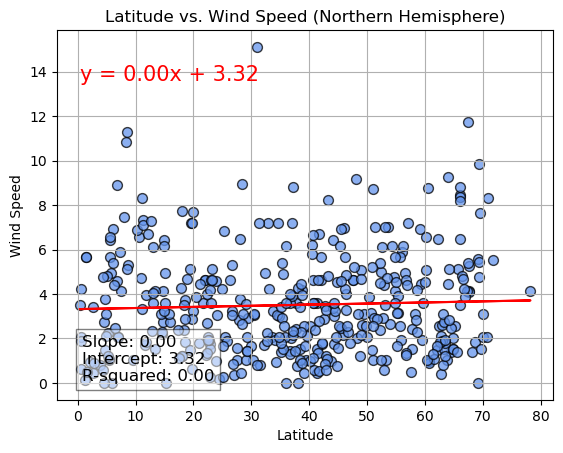

In [43]:
# Northern Hemisphere

# Extract x and y values from the DataFrame
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Label the x-axis and y-axis, set the title and add a grid
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed (Northern Hemisphere)")
plt.grid(True)

regressionplot (x_values, y_values)

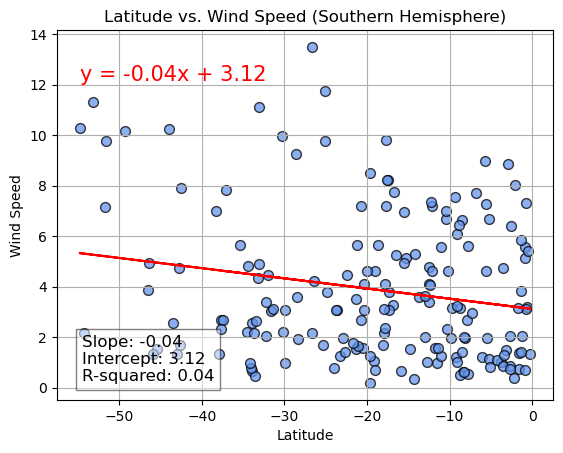

In [45]:
# Southern Hemisphere

# Extract x and y values from the DataFrame
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Label the x-axis and y-axis, set the title and add a grid
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed (Southern Hemisphere)")
plt.grid(True)

regressionplot (x_values, y_values)

**Discussion about the linear relationship:** In both the northern and southern hemisphere we do not see a relationship between the wind speed and latitude. The regression lines in both hemispheres are flat (north) or only nealy flat/slighly negatively correlated (south) with an r-squared of 0 (north) and 0.04 (south) indicating latitude is not an accurate predictor of wind speed in either hemisphere.